# Mushroom Edibility Classification
-------
In this notebook I will be working with a dataset containing data of 8124 different mushrooms.

With the help of Random Forest, I'll attempt to create a model that'll allow the accurate prediction of a mushroom, to find out whether a mushroom is...
__edible or poisonous__

There are 22 different features that'll help us come to that conclusion.

----
*Data from: https://www.kaggle.com/uciml/mushroom-classification*

*Alternate source: https://archive.ics.uci.edu/ml/datasets/Mushroom*

In [1]:
# Importing relevant libraries

## Data processing
import pandas as pd

## Data viz
import matplotlib.pyplot as plt
import seaborn as sn

## SkLearn pckages
from sklearn.preprocessing import LabelEncoder # Allows us to convert string values to numerical data.
    # Required to be able to fit to a random forest model
    
from sklearn.metrics import confusion_matrix # Confusion matrix

from sklearn.model_selection import train_test_split # Split data into testing and training sets

from sklearn.ensemble import RandomForestClassifier # Ensemble - using multiple algorithms - RF uses multiple decision trees 
    # Random forest model

In [2]:
# Importing our data
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\4. ML Practice Projects\Mushroom Classification\mushrooms.csv")
df_backup = df.copy()

In [3]:
# Let's see what the data looks like
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape

(8124, 23)

In [5]:
# Let's look at the data in some further detail
print(f'There are: {df.shape[0]} unique classes.')
print("-----------------------------------------")
print(f'There are: {df.shape[1] - 1} unique features.') # -1 because the class isn't a feature of use.
print("-----------------------------------------")
print(f'The unique feature names are: {list(df.columns[1:])}') # from 1 because the class isn't a feature.
print("-----------------------------------------")
print(f'There are: {df.shape[0]} unique animals.')

There are: 8124 unique classes.
-----------------------------------------
There are: 22 unique features.
-----------------------------------------
The unique feature names are: ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
-----------------------------------------
There are: 8124 unique animals.


### Glaring issue:
Data is in __strings__, we will need to __encode__ each column.
- This is very important as, to fit the model, we need to provide numerical data

### Data processing

In [6]:
# Let's see if there's any null data that we need to amend
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

The data is fairly clean and won't require any further action

#### Data encoding

As mentioned earlier, we need to __encode__ the data to be able to fit it to our model.

In [7]:
# Let's call label encoder to be able to complete this task
le = LabelEncoder()

In [8]:
# Store list of the columns as we need to encode *all* of them
cols = list(df.columns)

In [9]:
# Encoding columns - many at once
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


This method:
- __df[cols] = df[cols].apply(LabelEncoder().fit_transform)__
    - Allows you to encode multiple columns at once, if you have select columns to encode, change the cols variable accordingly
  
...or...

This aternative:
- __df.col_name = le.fit_transform(df.col_name)__
    - *col_name* is the specific column name you wish to encode


Since we've encoded the data, we can now move on to fitting the model.

In [10]:
# Extracting our targets
target = df['class']
target.head(2)

0    1
1    0
Name: class, dtype: int32

In [11]:
# Extracting our features
features = df.drop(columns=['class'], axis='columns')
features.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1


### Model fitting

In [12]:
# Splittig our data into testing/training sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
# Viewing the split data
print(f"The size of our training set is: {x_train.shape}")
print(f"The size of our test set is: {x_test.shape}")

The size of our training set is: (6499, 22)
The size of our test set is: (1625, 22)


In [14]:
# Importing our RF model
model = RandomForestClassifier()#(n_estimators=) 
    # *n_estimators* - number of Decision Trees

In [15]:
# Fitting our model
model.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
# Let's see the score of our model
model.score(x_test, y_test)

1.0

The model produces a score of 100% regardless on n_estimator tuning or not.
- __Unsure if there's data leakage__
- __Others from the Kaggle page mention this is common for others too - possibly not overfit__

Since out model is 100% accurate, there's no need to test the data further


### Confusion Matrix

You would use a CM to visualise the points where your model was accurate or not, however since our model hit 100% accuracy, we already know the end result.

Though, I'll still plot it to end the notebook nicely.

In [17]:
# Let's get our predicted targets
y_predicted = model.predict(x_test)

# Fit the confusion matrix
## Fit the CM with; y_test (truth) first, then y_predicted (prediction) second.
cm = confusion_matrix(y_test, y_predicted)
cm

array([[843,   0],
       [  0, 782]], dtype=int64)

Text(114.0, 0.5, 'True Values')

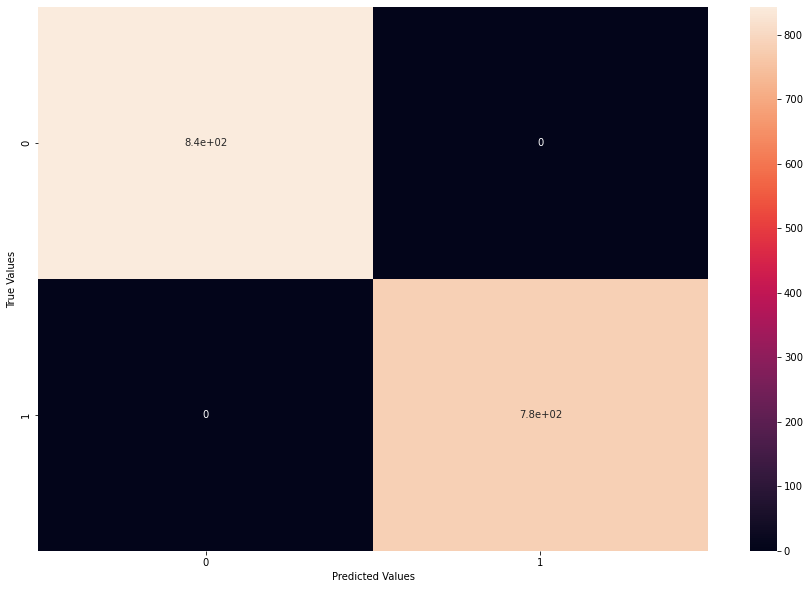

In [18]:
# Let's visualise the CM
plt.figure(figsize=(15,10))

# Plot CM
sn.heatmap(cm, annot=True)

# Set plot labels
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

As expected... no missed.